> # Predicción de la deserción universitaria y desarrollo académico

> ## Introduccion

El exito academico en la educacion superior es primordial para el crecimiento economico y el desarrollo como sociedad. La deserción universitaria representa uno de los mayores problemas que las instituciones educativas deben abordar sabiendo que su maximo generalmente se encuentra localizado durante el primer año de los estudiantes. 

La deserción universitaria se refiere a la tasa de estudiantes que abandonan sus estudios antes de graduarse mientras que el desarrollo academico se refiere al progreso que un estudiante hace en su educacion.

> ## Data Description 

El dataset incluye datos demograficos, socioeconomicos, macroeconomicos, datos al momento del enrollment del estudiante y datos al final del primer y segundo semestre.



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [2]:
df = pd.read_csv("../data/Desercion Universitaria.csv")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
null_values = df.isnull().sum().sum()
print(null_values) ## No existen missing values 

0


In [4]:
stats = df.describe(include="all")
print(stats)

        Marital status  Application mode  Application order       Course  \
count      4424.000000       4424.000000        4424.000000  4424.000000   
unique             NaN               NaN                NaN          NaN   
top                NaN               NaN                NaN          NaN   
freq               NaN               NaN                NaN          NaN   
mean          1.178571          6.886980           1.727848     9.899186   
std           0.605747          5.298964           1.313793     4.331792   
min           1.000000          1.000000           0.000000     1.000000   
25%           1.000000          1.000000           1.000000     6.000000   
50%           1.000000          8.000000           1.000000    10.000000   
75%           1.000000         12.000000           2.000000    13.000000   
max           6.000000         18.000000           9.000000    17.000000   

        Daytime/evening attendance  Previous qualification  Nacionality  \
count       

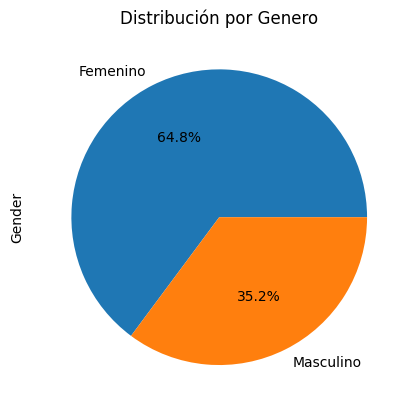

In [5]:
df["Gender"].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=["Femenino", "Masculino"])
plt.title("Distribución por Genero")
plt.show()

> El genero "Femenino" posee una proporcion mucho mayor que el genero "Masculino".

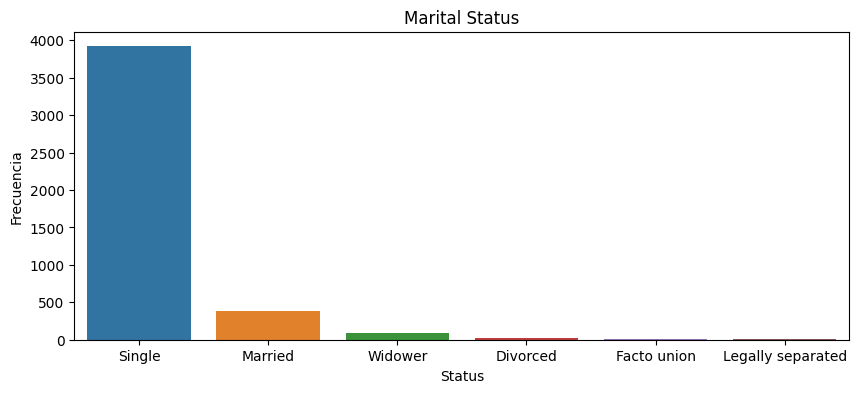

In [41]:
nombres = {1: "Single", 2: "Married", 3: "Widower", 4: "Divorced", 5: "Facto union", 6: "Legally separated"}
plt.figure(figsize=(10,4))
sns.countplot(x="Marital status", data=df, order=df["Marital status"].value_counts().index)
plt.xlabel("Status")
plt.ylabel("Frecuencia")
plt.title("Marital Status")
plt.xticks(np.arange(len(nombres)), nombres.values())
plt.show()

In [50]:
single_count = df[df['Marital status'] == 1].shape[0]
total_count = df.shape[0]
proportion = single_count / total_count
print("{:.1f}%".format(proportion*100))

88.6%


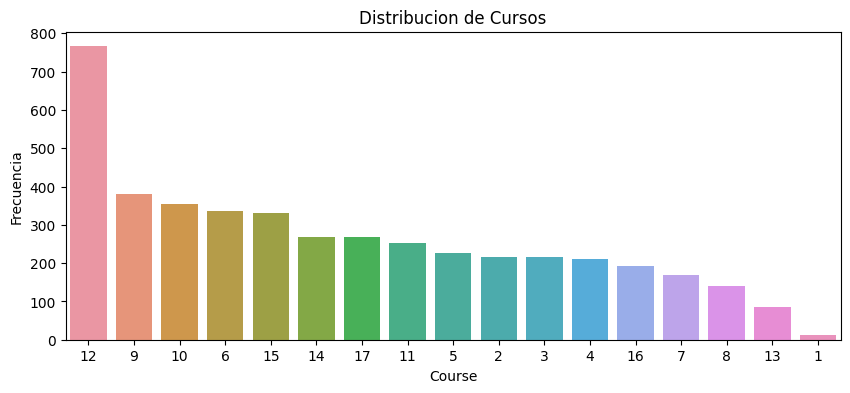

In [75]:
plt.figure(figsize=(10,4))
sns.countplot(x="Course", data=df, order=df["Course"].value_counts().index)
plt.xlabel("Course")
plt.ylabel("Frecuencia")
plt.title("Distribucion de Cursos")
plt.show()

> La mayor proporcion de estudiantes corresponde al curso nº 12 (Nursing), le sigue el curso nº 9 (Management), el nº 10 (Social Service) y el nº6 (Veterinary Nursing)

1. Biofuel Production Technologies
2. Animation and Multimedia Design
3. Social Service (evening attendance)
4. Agronomy
5. Communication Design
6. Veterinary Nursing
7. Informatics Engineering
8. Equiniculture
9. Management
10. Social Service
11. Tourism
12. Nursing
13. Oral Hygiene
14. Advertising and Marketing Management
15. Journalism and Communication
16. Basic Education
17. Management (evening attendance)

> En lo que respecta a las Nacionalidades, el 97,5% de los estudiantes son portugueses. Esto se debe a que los datos fueron brindados por el Instituto Politecnico do Porto.

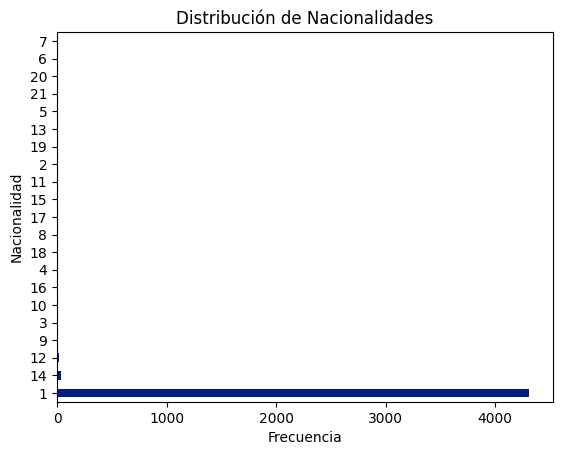

In [74]:
df["Nacionality"].value_counts().plot(kind='barh')
plt.xlabel("Frecuencia")
plt.ylabel("Nacionalidad")
plt.title("Distribución de Nacionalidades")
plt.show()

In [73]:
#Imprimo por pantalla la proporcion de estudiantes cuya Nacionalidad es "=1", es decir, portuguesa.
single_count = df[df['Nacionality'] == 1].shape[0]
total_count = df.shape[0]
proportion = single_count / total_count
print("{:.1f}%".format(proportion*100))

97.5%


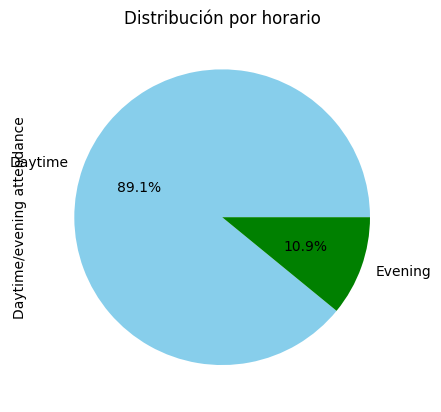

In [93]:
df["Daytime/evening attendance"].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=["Daytime", "Evening"], colors=["skyblue", "green"])
plt.title("Distribución por horario")
plt.show()

In [8]:
df.replace("Dropout",0,inplace=True)
df.replace("Enrolled",1,inplace=True)
df.replace("Graduate",2,inplace=True)

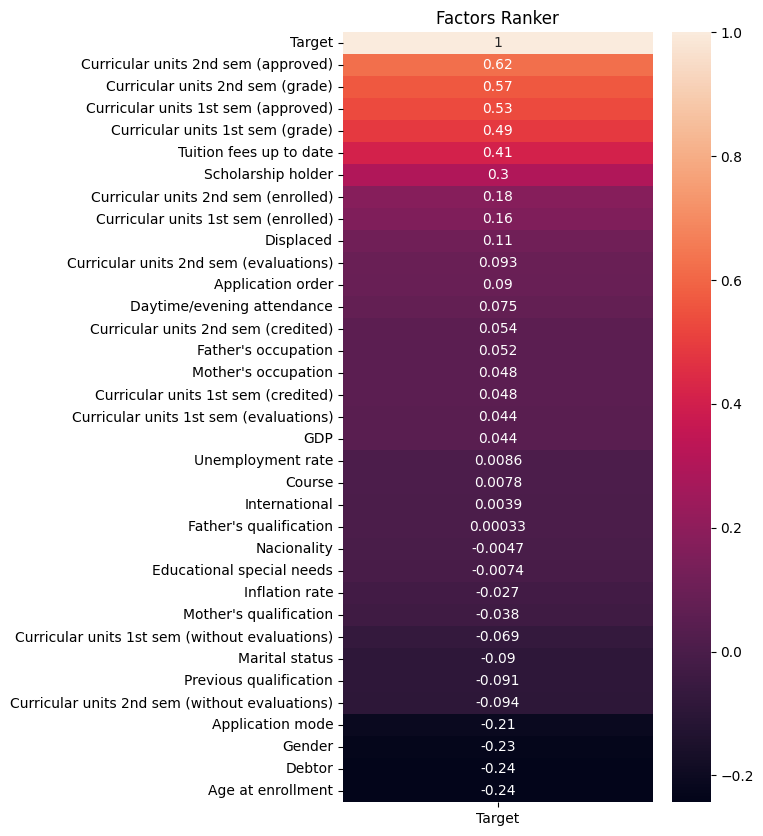

In [9]:
plt.figure(figsize = (5,10))
sns.heatmap(df.corr()[['Target']].sort_values(by='Target', ascending=False), annot = True)
plt.title('Factors Ranker')
plt.show()

In [10]:
train, val_test = train_test_split(df, test_size=0.2, random_state=0)
val, test = train_test_split(val_test, test_size=0.5, random_state=0)

# separa las variables independientes (X) de la variable dependiente (y)
X_train = train.drop('Target', axis=1)
y_train = train['Target']
X_val = val.drop('Target', axis=1)
y_val = val['Target']
X_test = test.drop('Target', axis=1)
y_test = test['Target']

model = xgb.XGBClassifier()

In [12]:
param_grid = {
    'learning_rate': [0.3, 0.5, 0.6],
    'max_depth': [3, 5, 7,],
    'n_estimators': [ 200, 250, 300],
	'colsample_bytree': [0.1, 0.2],
	'alpha': [1, 3,]
}


# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END alpha=1, colsample_bytree=0.1, learning_rate=0.3, max_depth=3, n_estimators=200; total time=   0.9s
[CV] END alpha=1, colsample_bytree=0.1, learning_rate=0.3, max_depth=3, n_estimators=200; total time=   1.0s
[CV] END alpha=1, colsample_bytree=0.1, learning_rate=0.3, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END alpha=1, colsample_bytree=0.1, learning_rate=0.3, max_depth=3, n_estimators=200; total time=   0.8s
[CV] END alpha=1, colsample_bytree=0.1, learning_rate=0.3, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END alpha=1, colsample_bytree=0.1, learning_rate=0.3, max_depth=3, n_estimators=250; total time=   0.9s
[CV] END alpha=1, colsample_bytree=0.1, learning_rate=0.3, max_depth=3, n_estimators=250; total time=   0.9s
[CV] END alpha=1, colsample_bytree=0.1, learning_rate=0.3, max_depth=3, n_estimators=250; total time=   1.0s
[CV] END alpha=1, colsample_bytree=0.1, learning_rate=0.3, max_de

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [1, 3], 'colsample_bytree': [0.1, 0.2],
                         'learning_rate': [0.3, 0.5, 0.6],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [200, 250, 300]},
             verbose=2)

In [13]:
print("Mejores hiperparámetros encontrados: ", grid_search.best_params_)

Mejores hiperparámetros encontrados:  {'alpha': 1, 'colsample_bytree': 0.2, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 300}


In [14]:
# crea un objeto del modelo XGBoost
xg_reg = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.2, learning_rate = 0.3,
                max_depth = 3, alpha = 1, n_estimators = 300)

In [15]:
xg_reg.fit(X_train, y_train)

# realiza predicciones en los datos de validación y prueba
val_predictions = xg_reg.predict(X_val)
test_predictions = xg_reg.predict(X_test)

In [16]:
val_acc = accuracy_score(y_val, val_predictions)
test_acc = accuracy_score(y_test, test_predictions)

# imprime la exactitud en los datos de validación y prueba
print("Exactitud en los datos de validación: ",val_acc)
print("Exactitud en los datos de prueba: ",test_acc)

Exactitud en los datos de validación:  0.7895927601809954
Exactitud en los datos de prueba:  0.8103837471783296
